In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

H = W = 800

img_dir = "/home/cha/py-mongo/client/resources/cubetown.png"
img = cv2.imread(img_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (H, W))

In [2]:
gray = np.array([50, 50, 50], dtype=np.int8)
black = np.array([0, 0, 0], dtype=np.int8)

for y in range(H):
    for x in range(W):
        if np.all(img[y, x, :] < gray):
            img[y, x, :] = black

img_dir = "/home/cha/py-mongo/client/resources/cubetown_no_grid.png"
cv2.imwrite(img_dir, img)

True

In [5]:
white = np.array([255, 255, 255], dtype=np.int32)
black = np.array([0, 0, 0], dtype=np.int32)

for y in range(H):
    for x in range(W):
        if np.all(img[y, x, :] == black):
            img[y, x, :] = white

img_dir = "/home/cha/py-mongo/client/resources/cubetown_white.png"
cv2.imwrite(img_dir, img)

True

In [3]:
vehicle = {0: np.array([-0.00526035,  0.0015748 ]), 
           1: np.array([-0.00526035,  0.0015748 ])}

obstacle = {0: np.array([[[ 22.4676344 , -30.51826532],
                          [ 23.01723726, -28.50085089],
                          [ 18.61129384, -27.30054267],
                          [ 18.06169098, -29.3179571 ]],

                         [[ 28.37091843, -28.40176268],
                          [ 28.84258594, -26.61581248],
                          [ 25.02264603, -25.6069705 ],
                          [ 24.55097852, -27.3929207 ]],

                         [[ 20.56483692, -27.0297756 ],
                          [ 21.37386875, -23.87560246],
                          [ 12.45204073, -21.58719198],
                          [ 11.6430089 , -24.74136513]],
                  
                         [[-19.74252641, -22.25483907],
                          [-20.36808721, -24.23951674],
                          [-15.88018262, -25.65408256],
                          [-15.25462182, -23.66940489]],
                  
                         [[ 12.34559077, -47.72806956],
                          [ 12.1582263 , -48.1642039 ],
                          [ 12.49819237, -48.31025423],
                          [ 12.68555684, -47.87411988]],
                  
                         [[  5.61520501,  12.47544994],
                          [  3.7846575 ,  12.9632056 ],
                          [  2.73896698,   9.03872795],
                          [  4.5695145 ,   8.55097229]],
                  
                         [[ 14.26016263, -28.15679733],
                          [ 14.74196959, -26.37355571],
                          [ 10.92782303, -25.34302662],
                          [ 10.44601607, -27.12626824]],
                  
                         [[-20.80516929, -25.92483021],
                          [-21.34791406, -27.73983371],
                          [-17.45676093, -28.90341439],
                          [-16.91401617, -27.08841088]],
                  
                         [[  3.89343481,   5.98608588],
                          [  2.0640291 ,   6.47810638],
                          [  1.00919528,   2.55607663],
                          [  2.83860099,   2.06405613]]]), 
            
            1: np.array([[[ 22.46297877, -30.51699735],
                          [ 23.01258257, -28.49958317],
                          [ 18.60663969, -27.29927291],
                          [ 18.0570359 , -29.31668709]],
                  
                         [[ 28.37091592, -28.40176147],
                          [ 28.84258921, -26.6158127 ],
                          [ 25.02265236, -25.60695836],
                          [ 24.55097907, -27.39290713]],
                  
                         [[ 20.56483692, -27.0297756 ],
                          [ 21.37386875, -23.87560246],
                          [ 12.45204073, -21.58719198],
                          [ 11.6430089 , -24.74136513]],
                  
                         [[-19.74252386, -22.25483825],
                          [-20.36808752, -24.23951492],
                          [-15.88018517, -25.65408719],
                          [-15.25462152, -23.66941052]],

                         [[ 12.34530114, -47.72831073],
                          [ 12.15824638, -48.16457799],
                          [ 12.49831606, -48.3103869 ],
                          [ 12.68537082, -47.87411963]],

                         [[  5.61520076,  12.47545647],
                          [  3.78465234,  12.96320863],
                          [  2.73896933,   9.03872905],
                          [  4.56951775,   8.55097689]],

                         [[ 14.26016263, -28.15679304],
                          [ 14.74196959, -26.37355142],
                          [ 10.92782303, -25.34302233],
                          [ 10.44601607, -27.12626395]],

                         [[-20.80516579, -25.9248338 ],
                          [-21.3479149 , -27.73983606],
                          [-17.45676444, -28.90342605],
                          [-16.91401532, -27.08842379]],

                         [[  3.89342966,   5.98608491],
                          [  2.06402293,   6.4781019 ],
                          [  1.00919662,   2.55606997],
                          [  2.83860335,   2.06405298]]]),} 

In [17]:
def draw_vehicle(arr, img, transform, scale_factor=10, radius=3, color=(0, 255, 0)):
    arr = (arr*scale_factor).astype(np.int32) + transform
    return cv2.circle(img, arr, radius, color)

# draw vehicle
frame = 1
vehicle_transform = np.array(([400, 10]), dtype=np.int32)
img = draw_vehicle(vehicle[frame], img, vehicle_transform)

In [18]:
def draw_obstacle(arr, img, transform, scale_factor=10, color=(0, 0, 255)):
    arr = (arr*scale_factor).astype(np.int32) + transform

    x_min, x_max = min(arr[:, 0]), max(arr[:, 0])
    y_min, y_max = min(arr[:, 1]), max(arr[:, 1])
    pt1, pt2 = (x_min, y_min), (x_max, y_max)
    return cv2.rectangle(img, pt1, pt2, color)

# draw polygon
obstacle_transform = np.array(([[400, 400],
                                [400, 400],
                                [400, 400],
                                [400, 400]]), dtype=np.int32)
# shape is (n, 4, 2)
num, _, _ = np.shape(obstacle[frame])
for n in range(num):
    img = draw_obstacle(obstacle[frame][n], img, obstacle_transform)

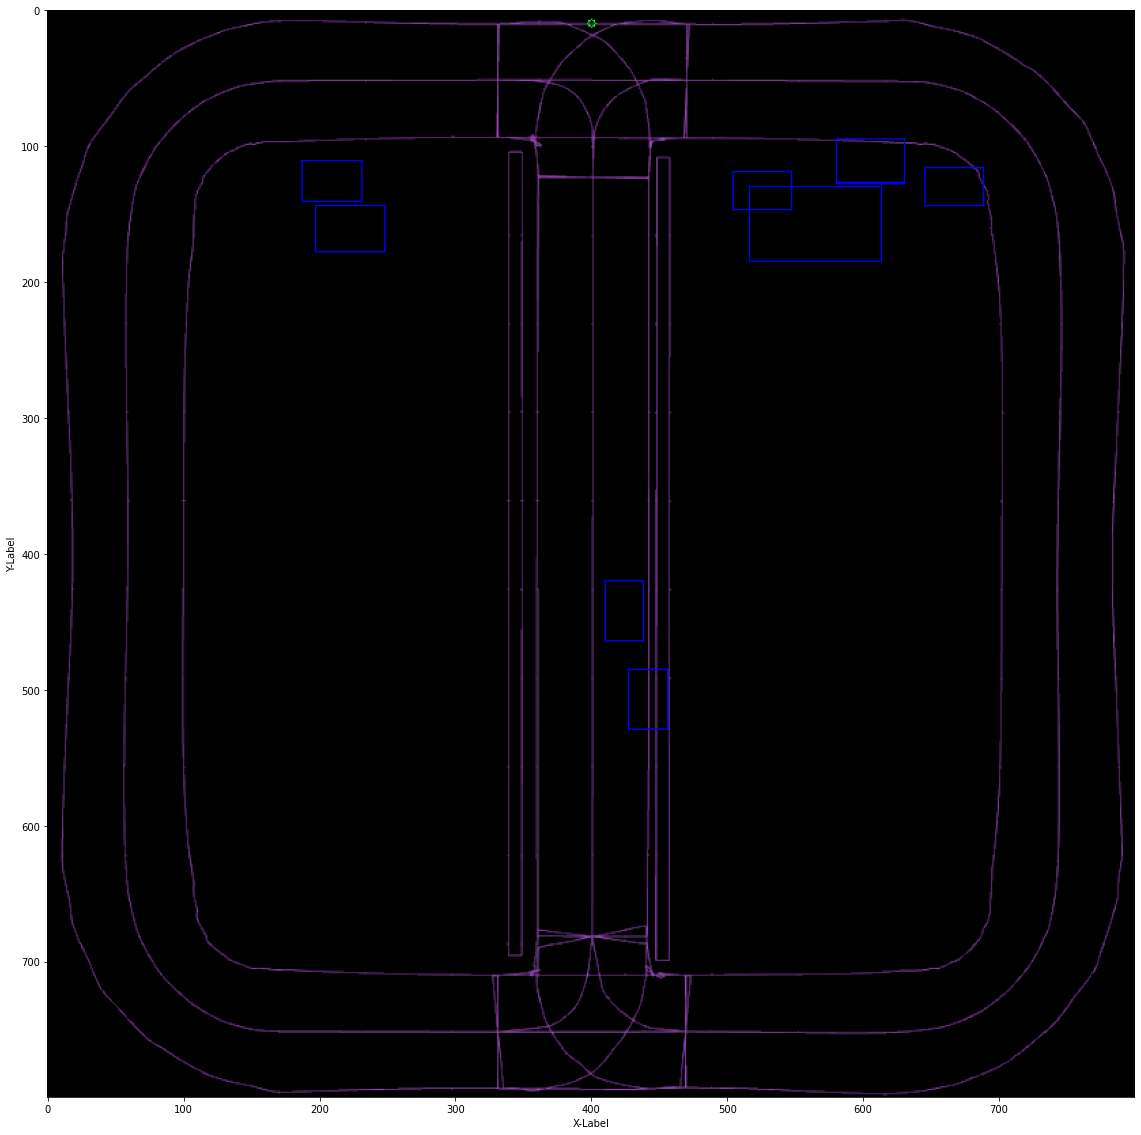

In [19]:
size = 20
plt.figure(figsize=(size, size))
plt.xlabel('X-Label')
plt.ylabel('Y-Label')
plt.imshow(img)
plt.show()